# Book Recommendation Engine

You've just finished a book. Well done, you! According to a Gallup poll, Americans read 12.6 books a year. And you know the worst thing when you've just finished a book is not knowing what to read next.

So, that's why I built a book recommendation engine. Using data like genres, reader ratings, and series, I'll give you at least five books to read next for every one you input.

Let's get started.

In [1]:
# basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn import neighbors

import warnings 
warnings.filterwarnings('ignore')

## EDA

The data comes from a Kaggle dataset full of book information. Included is the book title, author, average rating, language, description, genres, and more. Let's dig into it.

In [2]:
# data upload
df1 = pd.read_csv("data/books_1.csv", error_bad_lines=False)
df1.head()

,bookId,title,series,author,rating,description,language,isbn,genres,characters,...,firstPublishDate,awards,numRatings,ratingsByStars,likedPercent,setting,coverImg,bbeScore,bbeVotes,price
0,2767052-the-hunger-games,The Hunger Games,The Hunger Games #1,Suzanne Collins,4.33,WINNING MEANS FAME AND FORTUNE.LOSING MEANS CE...,English,9780439023481,"['Young Adult', 'Fiction', 'Dystopia', 'Fantas...","['Katniss Everdeen', 'Peeta Mellark', 'Cato (H...",...,NaN,['Locus Award Nominee for Best Young Adult Boo...,6376780,"['3444695', '1921313', '745221', '171994', '93...",96.0,"['District 12, Panem', 'Capitol, Panem', 'Pane...",https://i.gr-assets.com/images/S/compressed.ph...,2993816,30516,5.09
1,2.Harry_Potter_and_the_Order_of_the_Phoenix,Harry Potter and the Order of the Phoenix,Harry Potter #5,"J.K. Rowling, Mary GrandPré (Illustrator)",4.50,There is a door at the end of a silent corrido...,English,9780439358071,"['Fantasy', 'Young Adult', 'Fiction', 'Magic',...","['Sirius Black', 'Draco Malfoy', 'Ron Weasley'...",...,06/21/03,['Bram Stoker Award for Works for Young Reader...,2507623,"['1593642', '637516', '222366', '39573', '14526']",98.0,['Hogwarts School of Witchcraft and Wizardry (...,https://i.gr-assets.com/images/S/compressed.ph...,2632233,26923,7.38
2,2657.To_Kill_a_Mockingbird,To Kill a Mockingbird,To Kill a Mockingbird,Harper Lee,4.28,The unforgettable novel of a childhood in a sl...,English,9999999999999,"['Classics', 'Fiction', 'Historical Fiction', ...","['Scout Finch', 'Atticus Finch', 'Jem Finch', ...",...,07/11/60,"['Pulitzer Prize for Fiction (1961)', 'Audie A...",4501075,"['2363896', '1333153', '573280', '149952', '80...",95.0,"['Maycomb, Alabama (United States)']",https://i.gr-assets.com/images/S/compressed.ph...,2269402,23328,NaN
3,1885.Pride_and_Prejudice,Pride and Prejudice,NaN,"Jane Austen, Anna Quindlen (Introduction)",4.26,Alternate cover edition of ISBN 9780679783268S...,English,9999999999999,"['Classics', 'Fiction', 'Romance', 'Historical...","['Mr. Bennet', 'Mrs. Bennet', 'Jane Bennet', '...",...,01/28/13,[],2998241,"['1617567', '816659', '373311', '113934', '767...",94.0,"['United Kingdom', 'Derbyshire, England (Unite...",https://i.gr-assets.com/images/S/compressed.ph...,1983116,20452,NaN
4,41865.Twilight,Twilight,The Twilight Saga #1,Stephenie Meyer,3.60,About three things I was absolutely positive.\...,English,9780316015844,"['Young Adult', 'Fantasy', 'Romance', 'Vampire...","['Edward Cullen', 'Jacob Black', 'Laurent', 'R...",...,10/05/05,"['Georgia Peach Book Award (2007)', 'Buxtehude...",4964519,"['1751460', '1113682', '1008686', '542017', '5...",78.0,"['Forks, Washington (United States)', 'Phoenix...",https://i.gr-assets.com/images/S/compressed.ph...,1459448,14874,2.1


We do have some missing data for langauge, edition, publisher, price, and a few other columns. We're not going to be using most of these, so there isn't a problem yet.

In [3]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52478 entries, 0 to 52477
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   bookId            52478 non-null  object 
 1   title             52478 non-null  object 
 2   series            23470 non-null  object 
 3   author            52478 non-null  object 
 4   rating            52478 non-null  float64
 5   description       51140 non-null  object 
 6   language          48672 non-null  object 
 7   isbn              52478 non-null  object 
 8   genres            52478 non-null  object 
 9   characters        52478 non-null  object 
 10  bookFormat        51005 non-null  object 
 11  edition           4955 non-null   object 
 12  pages             50131 non-null  object 
 13  publisher         48782 non-null  object 
 14  publishDate       51598 non-null  object 
 15  firstPublishDate  31152 non-null  object 
 16  awards            52478 non-null  object

There are few columns for ratings. There is a strong correlation between "likedPercent" and "rating". The former refers to how many readers added the equivalent of a "thumbs up" or "would recommend" to their review while the latter is the average rating out of 5 readers have given the book. It's uncler what "bbe" refers to in "bbeScore" and "bbeVotes." We don't need these categories anyway since we have "rating." 

In [4]:
df1.corr()

,rating,numRatings,likedPercent,bbeScore,bbeVotes
rating,1.000000,0.014862,0.805538,0.015355,0.015552
numRatings,0.014862,1.000000,0.014014,0.709224,0.719138
likedPercent,0.805538,0.014014,1.000000,0.005688,0.005931
bbeScore,0.015355,0.709224,0.005688,1.000000,0.999303
bbeVotes,0.015552,0.719138,0.005931,0.999303,1.000000


Most of the ratings seem to be around 4 out of 5, with quite a few near but not on 5. Almost nothing seems to rank lower than a 2.

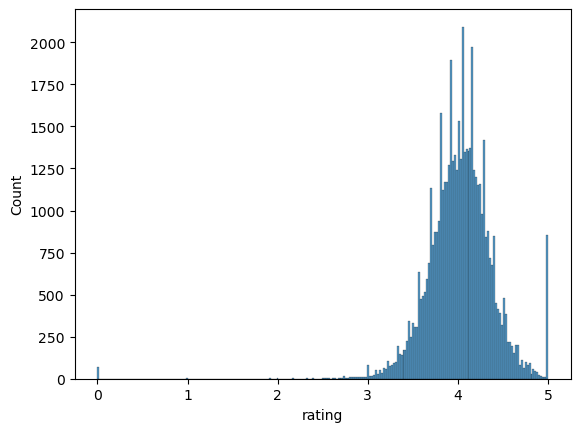

In [5]:
sns.histplot(x = df1["rating"]);

Similarly, most of the "likedPercent" is gathered around the 90% mark. There's a good chance people who didn't like the book or didn't finish it didn't bother to like or not like it, meaning the majority of those voting are those who liked the book.

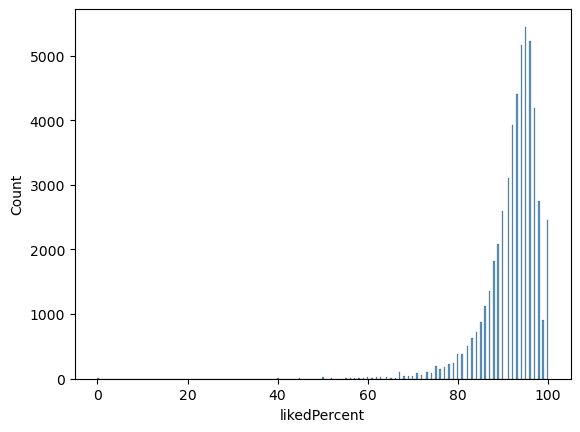

In [6]:
sns.histplot(x = df1["likedPercent"]);

Another key category for us is the genres. Most of the genres in the dataset are in the form of nested lists. We're going to have to one-hot encode these so we know where our books fall in comparison to each other. A lot of the genres listed are also a little odd like "Lds Fiction." We're going to want to limit our dataset to genres that are represented in a good chunk of our books.

In [7]:
df1["genres"]

0        ['Young Adult', 'Fiction', 'Dystopia', 'Fantas...
1        ['Fantasy', 'Young Adult', 'Fiction', 'Magic',...
2        ['Classics', 'Fiction', 'Historical Fiction', ...
3        ['Classics', 'Fiction', 'Romance', 'Historical...
4        ['Young Adult', 'Fantasy', 'Romance', 'Vampire...
                               ...                        
52473    ['Vampires', 'Paranormal', 'Young Adult', 'Rom...
52474                           ['Mystery', 'Young Adult']
52475    ['Fantasy', 'Young Adult', 'Paranormal', 'Ange...
52476    ['Fiction', 'Mystery', 'Historical Fiction', '...
52477    ['Lds Fiction', 'Historical Fiction', 'Young A...
Name: genres, Length: 52478, dtype: object

Similarly, about half of the books in the dataset belong to series. There are nan values in this column, indicating, perhaps that those books don't belong to any series. We also have a lot of books that seem to be the only books in their series (or at least the only ones we have in the dataset). We're going to want to cut out any series that doesn't have at least 2 books in them.

Also, many series titles are accompanied by a number and hashtag. It doesn't help us to know what number in the series a book is but only that it belongs to a series so the recommendation engine can suggest more books in the same series. We'll remove these from the series titles to help with this.

In [8]:
df1["series"].value_counts().tail(10)

Wrong Reasons #1                  1
H.I.V.E. #2                       1
Weddings by Bella #2              1
Mythic #1                         1
Tunnels #3                        1
Cotton Malone #1                  1
Dirk Pitt #19                     1
Incarnations of Immortality #3    1
Bad Kitty #1                      1
Stripling Warrior #1              1
Name: series, dtype: int64

## Data Preparation

There's a lot to clean up in this dataset to get something usable for our recommendation engine. We'll start with removing extra authors from the set (usually translators or illustrators) and the tag "Goodreads Author" wherever it appears. Then we'll get rid of extra information and unusuable rows. We also only want books that have at least 1000 ratings to ensure that the "rating" score is valid with a good amount of input and not unfairly inflated or deflated.

In [9]:
# change author column to only contain main author
df1["author"] = df1["author"].str.split(",")
df1["author"] = df1["author"].str[0]
df1["author"] = df1["author"].str.replace("\(Goodreads Author\)", "")


# limit dataframe to works in English
df1 = df1.loc[df1["language"] == "English"]

# drop unnecessary columns
df1 = df1.drop(columns=["bookId", "language", "isbn", "characters", "bookFormat", "edition", 
                        "setting", "bbeScore", "bbeVotes", "price", "ratingsByStars", "coverImg",
                       "likedPercent", "publishDate", "firstPublishDate"])

# rename columns
df1.rename(columns = {"pages": "num_pages"}, inplace = True)

# drop duplicate entries
df1 = df1.drop_duplicates(subset = ["title", "author"])

# remove numbers from series column
df1['series'] = df1['series'].str.replace('\d+', '').str.replace("#", "")

# remove rows with less than 1000 ratings
df1 = df1.loc[df1["numRatings"] >= 1000]

We want to create columns for each individual genre ("Young Adult," "Zombies," etc.) that include 1 or 0 if the book falls into that category or not. We also only want genres that show up at least 500 times.

In [10]:
# separate genres in column
df1["genres"] = df1["genres"].str.strip("[]")
df1["genres"] = df1["genres"].str.split(",")

The code to one-hot encode and stack genres comes from joris on stackoverflow.

In [11]:
# one-hot encode genres
df2 = pd.get_dummies(df1["genres"].apply(pd.Series).stack()).sum(level=0)

In [12]:
# concat dataframes
df = df1.merge(df2, left_index=True, right_index=True)

In [13]:
# drop genres that are represented in less than 500 books
genre_cols = df.columns[10:]
df[genre_cols].astype(int)
for col in df[genre_cols]:
    if df[col].sum() < 500:
        df.drop(col, axis=1, inplace=True)

In [14]:
# fix column names
df.columns = df.columns.str.replace("'","")
df.columns = df.columns.str.strip()
df.columns = df.columns.str.lower()

Instead of using the exact percentages for "ratings," we'll use bins that we can one-hot encode. We can see that the vast majority of books are rated between 3.5 and 4.5. 

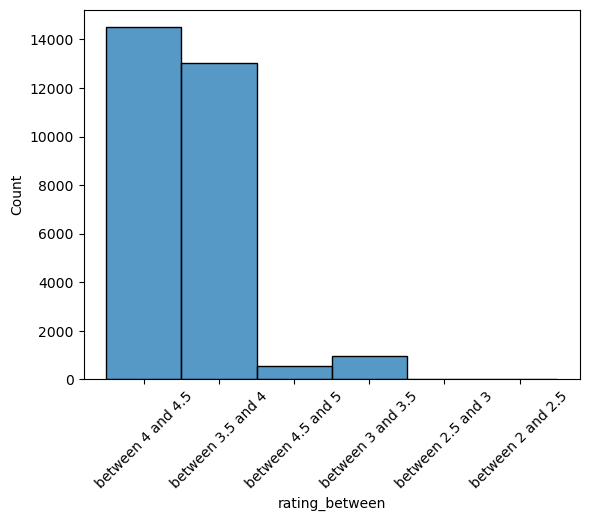

In [15]:
# one-hot encode bins for ratings
df.loc[ (df['rating'] > 2) & (df['rating'] <= 2.5), 'rating_between'] = "between 2 and 2.5"
df.loc[ (df['rating'] > 2.5) & (df['rating'] <= 3), 'rating_between'] = "between 2.5 and 3"

df.loc[ (df['rating'] > 3) & (df['rating'] <= 3.5), 'rating_between'] = "between 3 and 3.5"
df.loc[ (df['rating'] > 3.5) & (df['rating'] <= 4), 'rating_between'] = "between 3.5 and 4"

df.loc[ (df['rating'] > 4) & (df['rating'] <= 4.5), 'rating_between'] = "between 4 and 4.5"
df.loc[ (df['rating'] > 4.5) & (df['rating'] <= 5), 'rating_between'] = "between 4.5 and 5"

# plot count
sns.histplot(data = df, x = "rating_between")
plt.xticks(rotation = 45);

In [16]:
# drop columns
df = pd.get_dummies(df, columns = ["rating_between"], drop_first=True)
df = df.drop(columns=["rating", "genres"])

In [17]:
# reset index
df = df.reset_index().drop(columns = "index")
df.head()

,title,series,author,description,num_pages,publisher,awards,numratings,19th century,20th century,...,nonfiction,paranormal,romance,science fiction,young adult,rating_between_between 2.5 and 3,rating_between_between 3 and 3.5,rating_between_between 3.5 and 4,rating_between_between 4 and 4.5,rating_between_between 4.5 and 5
0,The Hunger Games,The Hunger Games,Suzanne Collins,WINNING MEANS FAME AND FORTUNE.LOSING MEANS CE...,374,Scholastic Press,['Locus Award Nominee for Best Young Adult Boo...,6376780,0,0,...,0,0,0,0,1,0,0,0,1,0
1,Harry Potter and the Order of the Phoenix,Harry Potter,J.K. Rowling,There is a door at the end of a silent corrido...,870,Scholastic Inc.,['Bram Stoker Award for Works for Young Reader...,2507623,0,0,...,0,0,0,0,0,0,0,0,1,0
2,To Kill a Mockingbird,To Kill a Mockingbird,Harper Lee,The unforgettable novel of a childhood in a sl...,324,Harper Perennial Modern Classics,"['Pulitzer Prize for Fiction (1961)', 'Audie A...",4501075,0,0,...,0,0,0,0,0,0,0,0,1,0
3,Pride and Prejudice,NaN,Jane Austen,Alternate cover edition of ISBN 9780679783268S...,279,Modern Library,[],2998241,0,0,...,0,0,0,0,0,0,0,0,1,0
4,Twilight,The Twilight Saga,Stephenie Meyer,About three things I was absolutely positive.\...,501,"Little, Brown and Company","['Georgia Peach Book Award (2007)', 'Buxtehude...",4964519,0,0,...,0,0,0,0,1,0,0,1,0,0


## The Recommendation Engine

Now that our dataset is cleaned up, we're going to make a recommendation engine using the K Nearest Neighbors model. We'll remove all our categorical columns so we match books based on genres, reader ratings, and series.

In [18]:
# drop non-numerical columns for model
features = df.drop(columns = ["title", "author", "description", "num_pages", "publisher", "awards", 
                              "numratings", "series"])

# fit and transform with MinMaxScaler
min_max_scaler = MinMaxScaler()
features = min_max_scaler.fit_transform(features)

In [19]:
# fit KNN model
model = neighbors.NearestNeighbors(n_neighbors=6, algorithm='ball_tree')
model.fit(features)
dist, idlist = model.kneighbors(features)

Now that we have the model, we'll define a function that gives us a list of recs for every book we put in.

In [20]:
# define function
def BookRecommender(book_name):
    book_list_name = []
    book_id = df[df['title'] == book_name].index
    book_id = book_id[0]
    for newid in idlist[book_id]:
        title = df.loc[newid].title
        author = df.loc[newid].author
        if title == book_name:
            pass
        else:
            book_list_name.append(f"{title} by {author}")
        
    return book_list_name   

Let's try it!

In [21]:
BookRecommender('Pride and Prejudice')

['Gone with the Wind by Margaret Mitchell',
 'Doctor Zhivago by Boris Pasternak',
 'Les Liaisons dangereuses by Pierre Choderlos de Laclos',
 'Les Misérables by Victor Hugo',
 'The Color Purple by Alice Walker']

In [22]:
BookRecommender('Twilight')

['The Fury / Dark Reunion by L.J. Smith ',
 'Evernight by Claudia Gray ',
 'Marked by P.C. Cast ',
 'The Awakening / The Struggle by L.J. Smith ',
 'The Twilight Collection by Stephenie Meyer']

In [23]:
BookRecommender('The Hunger Games')

['Divergent by Veronica Roth ',
 'Divergent Series Complete Box Set by Veronica Roth ',
 'Legend by Marie Lu ',
 'Catching Fire by Suzanne Collins',
 'Insurgent by Veronica Roth ']

In [24]:
BookRecommender('Les Misérables')

['Les Liaisons dangereuses by Pierre Choderlos de Laclos',
 'Consuelo by George Sand',
 'The Count of Monte Cristo by Alexandre Dumas',
 'The Man Who Laughs by Victor Hugo',
 'The Three Musketeers by Alexandre Dumas']

In [25]:
BookRecommender("To Kill a Mockingbird")

['El Filibusterismo by José Rizal',
 'Noli Me Tángere [Touch Me Not] by José Rizal',
 'The Paul Street Boys by Ferenc Molnár',
 "Harper Lee's To Kill a Mockingbird by Harold Bloom (Editor)",
 'A Tree Grows in Brooklyn by Betty Smith']

In [26]:
BookRecommender("Jane Eyre")

['Wives and Daughters by Elizabeth Gaskell',
 'Anna Karenina by Leo Tolstoy',
 'North and South by Elizabeth Gaskell',
 'El Filibusterismo by José Rizal',
 'Persuasion by Jane Austen']

## Conclusion & Next Steps

As you can see, the book recommendation engine gives you some pretty good suggestions for the books you put in. But there are still a few kinks to work out:

1. Sometimes the recommendation engine gives you the whole series as a suggestion or a re-issue, this seems a bit obvious. We can clean up the dataset further to remove box sets or re-issues.
2. Despite the size of the dataset (29k at the end of cleaning), there are still a lot of books that this system doesn't have. We can update it with more recent book releases, especially modern classics and bestsellers.
3. It'd be nice to know what genres the recommendations are falling into to give the user more to explore. We can add to the for loop to allow for this.

And finally, wouldn't it be nice to have an app or pretty front-end to make all of this more accessible for users? That's coming right up!